In [177]:
import json
import os
from tqdm import tqdm 

In [178]:
list_files = os.listdir("bert-as-language-model/results/")[1:]

In [179]:
list_files =[file for file in list_files if file[-5:] == '.json']

In [180]:
perplex = []
prob = []
for file in tqdm(list_files):
    with open(f'bert-as-language-model/results/{file}', "r") as read_file:
        data = json.load(read_file)
    data = [data[i:i + 2] for i in range(0, len(data), 2)]
    for evfim, fixed in data:
        evfim_prob, fixed_prob = 0, 0
        evfim_tokens = set([token['token'] for token in evfim['tokens']])
        fixed_tokens = set([token['token'] for token in fixed['tokens']])
        evfimism_tokens = evfim_tokens - fixed_tokens
        real_word_tokens = fixed_tokens - evfim_tokens
        for token in evfim['tokens']:
            if token['token'] in evfimism_tokens:
                evfim_prob+=token['prob']
        for token in fixed['tokens']:
            if token['token'] in real_word_tokens:
                fixed_prob+=token['prob']
        perplex.append(evfim['ppl'] - fixed['ppl'])
        if len(evfimism_tokens) == 0 or len(real_word_tokens) == 0:
            continue
        evfim_prob /= len(evfimism_tokens)
        fixed_prob /= len(real_word_tokens)
        prob.append(fixed_prob - evfim_prob)
        


100%|██████████| 1215/1215 [00:00<00:00, 2637.43it/s]


In [181]:
import matplotlib.pyplot as plt

In [182]:
prob = [pr for pr in prob if pr < 1 and pr > -1]

''

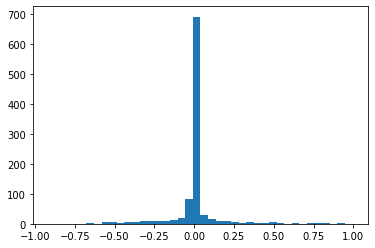

In [183]:
plt.hist(prob, bins=40)
''

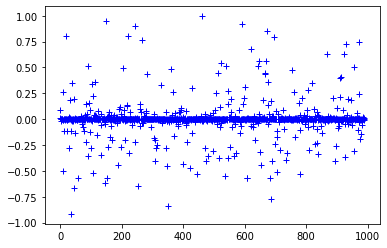

In [184]:
plt.plot(prob, 'b+')


In [185]:
m,b = 0,0
plus = []
minu = []
for i in prob:
    if i < 0:
        m += 1
        minu.append(i)
    elif i > 0:
        b += 1
        plus.append(i)
print(m,sum(minu)/len(minu),b,sum(plus)/len(plus) )

474 -0.06659018713689721 516 0.06278456763497503


In [186]:
data = [data[i:i + 2] for i in range(0, len(data), 2)]

In [30]:
for evfim, fixed in data:
    evfim_prob, fixed_prob = 0, 0
    evfim_tokens = set([token['token'] for token in evfim['tokens']])
    fixed_tokens = set([token['token'] for token in fixed['tokens']])
    evfimism_tokens = evfim_tokens - fixed_tokens
    real_word_tokens = fixed_tokens - evfim_tokens
    for token in evfim['tokens']:
        if token['token'] in evfimism_tokens:
            evfim_prob+=token['prob']
    for token in fixed['tokens']:
        if token['token'] in real_word_tokens:
            fixed_prob+=token['prob']
    evfim_prob /= len(evfimism_tokens)
    fixed_prob /= len(real_word_tokens)
    (fixed_prob - evfim_prob)
    print(evfim['ppl'] - fixed['ppl'])

0.0026506992217036895
-4352.477308019061
